# **GLOBAL CYBERSECURITY THREAT ANALYSIS**

<b>Dataset Overview:</b>
The Global Cybersecurity Threats Dataset (2015-2024) is a comprehensive collection of cybersecurity incidents that have occurred worldwide over the past decade. The dataset contains 3,001 records of various cyber incidents, providing a global perspective on how cybersecurity threats have evolved.

<b>Source:</b> The dataset is sourced from Kaggle, a platform for data science competitions and datasets.

<b>Purpose:</b> This dataset was designed for multiple applications in the cybersecurity domain:


<b>Context:</b> The data spans a decade (2015-2024) of global cyber incidents, covering various attack types, affected industries, and countries. It provides insights into the changing landscape of cybersecurity threats, their financial impact, and the effectiveness of various defense mechanisms.

The notebook is organized into sections that follow a logical progression:



1. Data loading and initial exploration
2. Visualizations for numerical variables (histograms)
3. Visualizations for categorical variables (bar charts, pie charts)
4. Summary statistics for all variables
5. Relationship exploration using scatter plots, boxplots, and heatmaps
6. Time-based analysis of cybersecurity incidents and financial losses
7. Geographic analysis of affected countries
8. Attack vector analysis exploring vulnerabilities and defense mechanisms
9. A comprehensive summary of key findings

## **Data Loading, Inspection, and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

# Set styling for better visualization
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
from google.colab import files
import pandas as pd

# Upload the CSV file manually
uploaded = files.upload()

# Read the uploaded file
import io
data = pd.read_csv(io.BytesIO(uploaded['Global_Cybersecurity_Threats_2015-2024.csv']))


Saving Global_Cybersecurity_Threats_2015-2024.csv to Global_Cybersecurity_Threats_2015-2024.csv


In [3]:
# Display basic information
print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
data.head()

Dataset shape: (3000, 10)

First 5 rows:


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [4]:
# Check for missing values
print("Missing values check:\n")
print(data.isnull().sum())

Missing values check:

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [5]:
# Data types information
print("Data types information:\n")
print(data.dtypes)

Data types information:

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object


In [6]:
cat_cols = ['Country', 'Attack Type', 'Target Industry', 'Attack Source',
            'Security Vulnerability Type', 'Defense Mechanism Used']
data[cat_cols] = data[cat_cols].astype('category')

In [7]:
# Data types information
print("Data types information:\n")
print(data.dtypes)

Data types information:

Country                                category
Year                                      int64
Attack Type                            category
Target Industry                        category
Financial Loss (in Million $)           float64
Number of Affected Users                  int64
Attack Source                          category
Security Vulnerability Type            category
Defense Mechanism Used                 category
Incident Resolution Time (in Hours)       int64
dtype: object


In [8]:
# Basic statistics overview
print("Basic statistics for numerical variables:\n")
data.describe()

Basic statistics for numerical variables:



,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [9]:
for col in data.select_dtypes(include='category').columns:
    print(f"{col}: {data[col].nunique()} unique values")

Country: 10 unique values
Attack Type: 6 unique values
Target Industry: 7 unique values
Attack Source: 4 unique values
Security Vulnerability Type: 4 unique values
Defense Mechanism Used: 5 unique values


## **Visualizations for Numerical Variables**

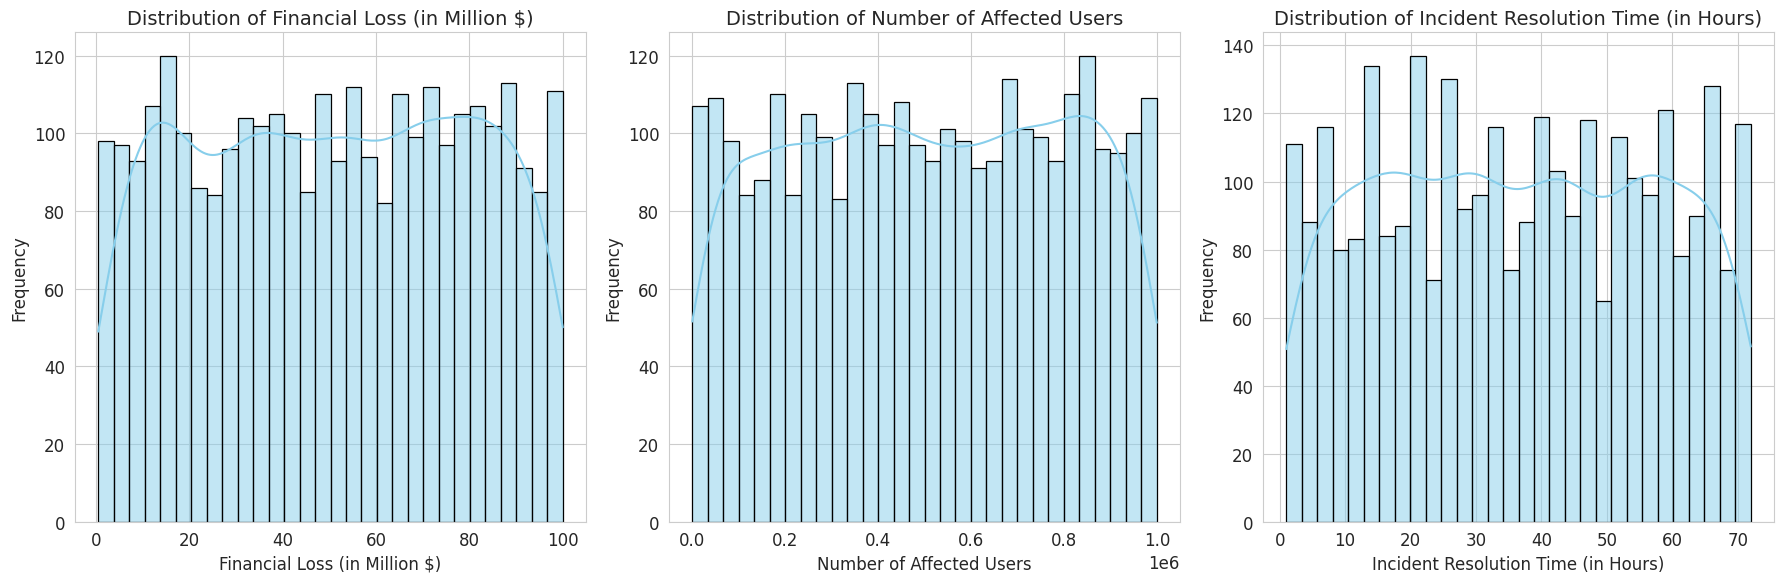


Skewness of numerical variables:
Financial Loss (in Million $): -0.0169
Number of Affected Users: -0.0254
Incident Resolution Time (in Hours): 0.0111


In [10]:
# Create histograms for numerical variables
numerical_vars = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, var in enumerate(numerical_vars):
    sns.histplot(data[var], bins=30, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('numerical_histograms.png')
plt.show()

# Check for skewness
print("\nSkewness of numerical variables:")
for var in numerical_vars:
    skewness = stats.skew(data[var])
    print(f"{var}: {skewness:.4f}")

### 📊 Numerical Variable Distributions

- The distributions of financial loss, affected users, and incident resolution times reveal potential skewness.
- Skewness values help determine if data transformations (like log scaling) are needed for modeling.


All three numerical variables financial loss, number of affected users, and incident resolution time exhibit broad, relatively uniform distributions. This indicates that cybersecurity incidents are highly variable in their impact and duration, with no single pattern dominating. Organizations should be prepared for a wide range of potential outcomes when it comes to financial losses, user impact, and recovery time.

## **Visualizations for Categorical Variables**

<ipython-input-11-225d6a52e699>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


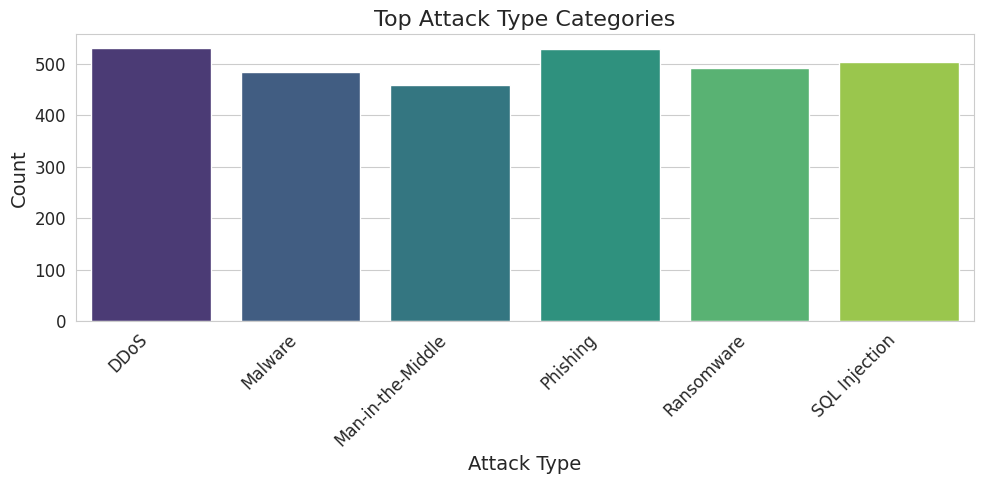

<ipython-input-11-225d6a52e699>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


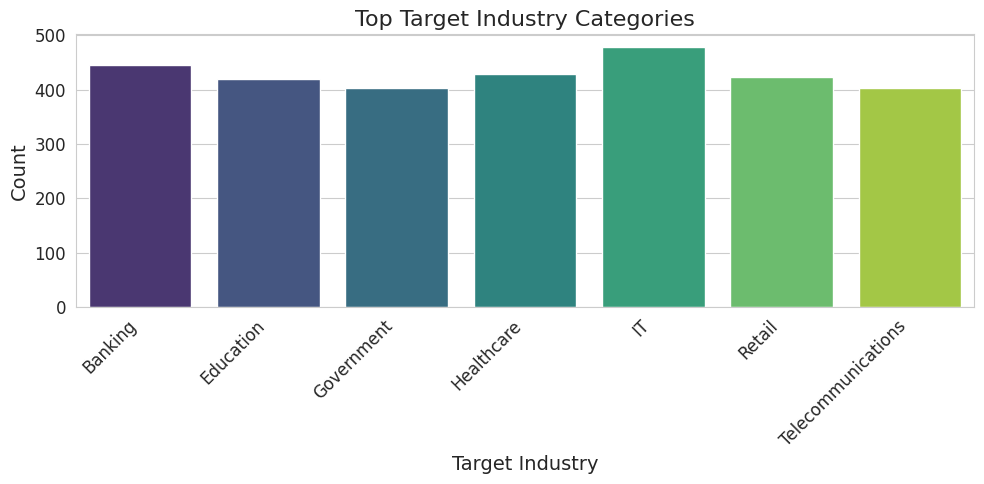

<ipython-input-11-225d6a52e699>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


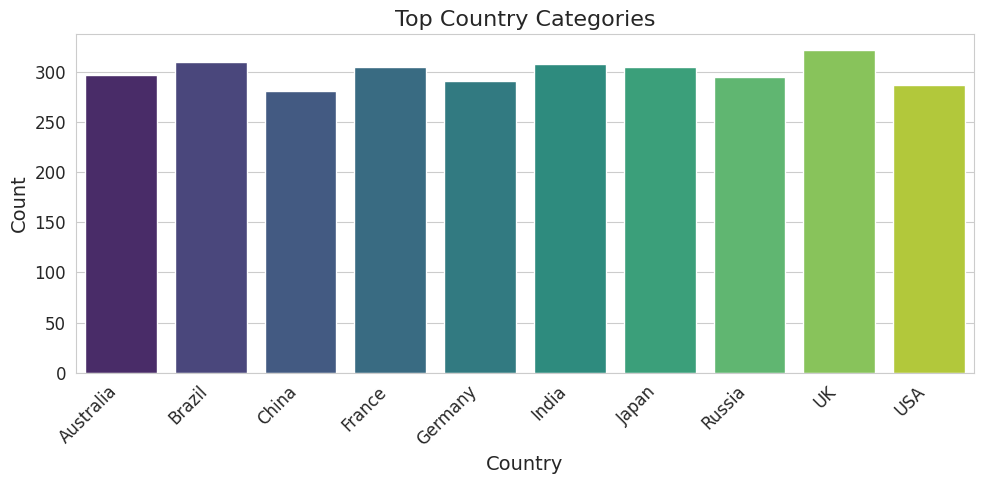

<ipython-input-11-225d6a52e699>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


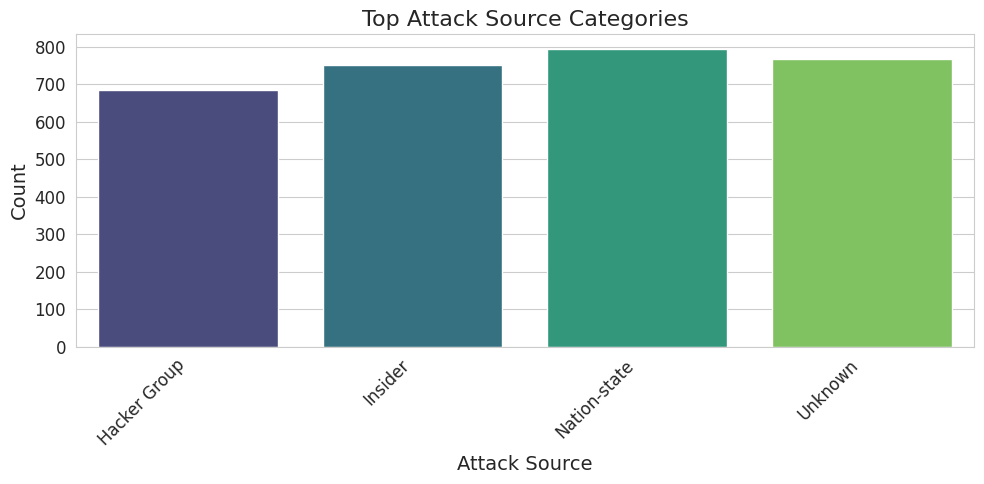

<ipython-input-11-225d6a52e699>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


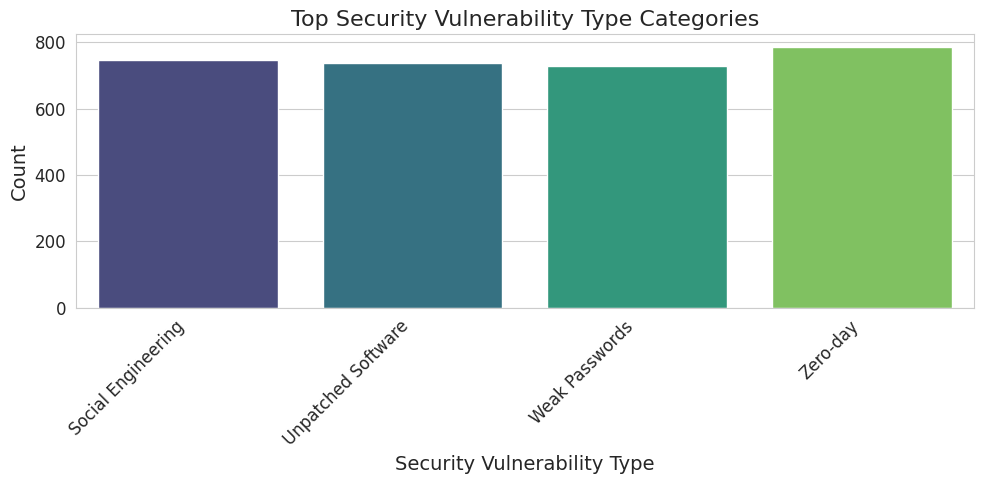

<ipython-input-11-225d6a52e699>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


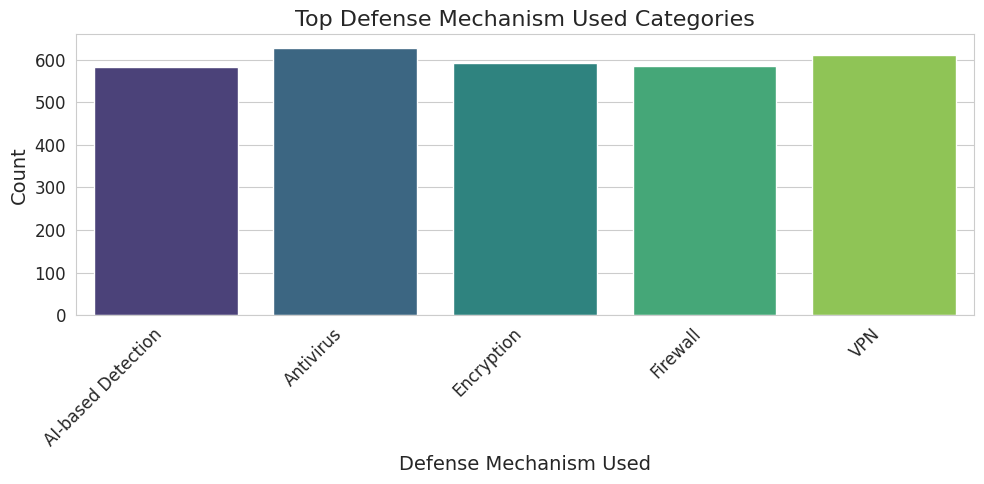

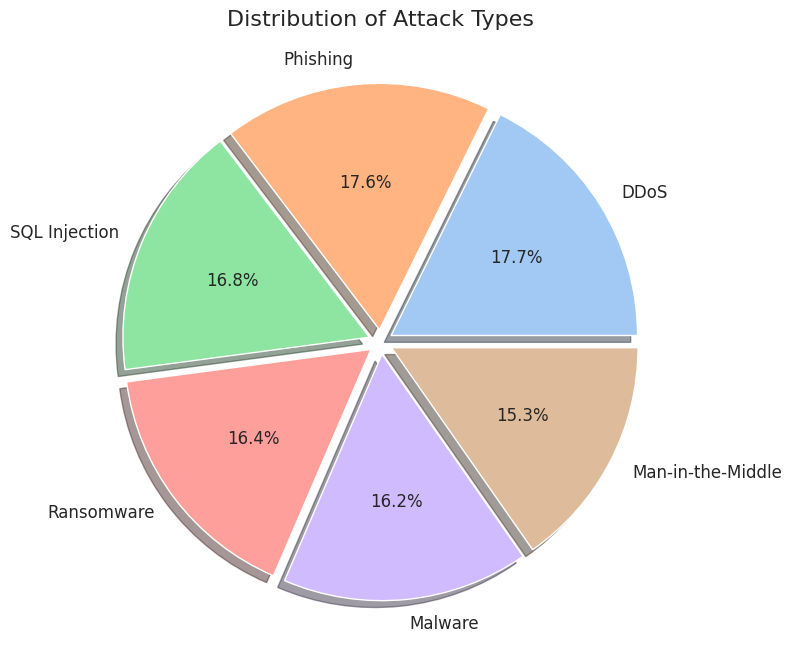

In [11]:
# Create bar charts for categorical variables
categorical_vars = ['Attack Type', 'Target Industry', 'Country', 'Attack Source',
                   'Security Vulnerability Type', 'Defense Mechanism Used']

# Plot bar charts for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    counts = data[var].value_counts().head(10)  # Top 10 categories
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Top {var} Categories', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{var}_barplot.png')
    plt.show()

# Create a pie chart for Attack Type
plt.figure(figsize=(8, 8))
data['Attack Type'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=[0.05]*len(data['Attack Type'].unique()),
                                          colors=sns.color_palette('pastel', len(data['Attack Type'].unique())))
plt.title('Distribution of Attack Types', fontsize=16)
plt.ylabel('')  # Hide ylabel
plt.savefig('attack_type_pie.png')
plt.show()

## **Summary Statistics for Variables**

In [12]:
# For numerical variables
print("\nSummary statistics for numerical variables:")
for var in numerical_vars:
    skewness = stats.skew(data[var])

    if abs(skewness) > 0.5:
        q1, q2, q3 = np.percentile(data[var], [25, 50, 75])
        min_val = data[var].min()
        max_val = data[var].max()
        print(f"\n{var} (Five-number summary - skewed distribution):")
        print(f"Min: {min_val:.2f}")
        print(f"Q1: {q1:.2f}")
        print(f"Median: {q2:.2f}")
        print(f"Q3: {q3:.2f}")
        print(f"Max: {max_val:.2f}")
    else:
        mean = data[var].mean()
        std = data[var].std()
        print(f"\n{var} (Mean and standard deviation - symmetric distribution):")
        print(f"Mean: {mean:.2f}")
        print(f"Standard Deviation: {std:.2f}")


Summary statistics for numerical variables:

Financial Loss (in Million $) (Mean and standard deviation - symmetric distribution):
Mean: 50.49
Standard Deviation: 28.79

Number of Affected Users (Mean and standard deviation - symmetric distribution):
Mean: 504684.14
Standard Deviation: 289944.08

Incident Resolution Time (in Hours) (Mean and standard deviation - symmetric distribution):
Mean: 36.48
Standard Deviation: 20.57


Summary statistics show that the average financial loss per incident is 50.5 million (SD 28.8M), with an average of about 504,684 users affected (SD 289,944) and a mean resolution time of 36.5 hours (SD 20.6). These high standard deviations highlight the unpredictability and potential severity of cybersecurity incidents.

In [13]:
# For categorical variables
print("\nFrequency tables for categorical variables:")
for var in categorical_vars:
    print(f"\n{var}:")
    freq_table = data[var].value_counts().reset_index()
    freq_table.columns = [var, 'Count']
    print(freq_table.head(10))  # top 10


Frequency tables for categorical variables:

Attack Type:
         Attack Type  Count
0               DDoS    531
1           Phishing    529
2      SQL Injection    503
3         Ransomware    493
4            Malware    485
5  Man-in-the-Middle    459

Target Industry:
      Target Industry  Count
0                  IT    478
1             Banking    445
2          Healthcare    429
3              Retail    423
4           Education    419
5          Government    403
6  Telecommunications    403

Country:
     Country  Count
0         UK    321
1     Brazil    310
2      India    308
3      Japan    305
4     France    305
5  Australia    297
6     Russia    295
7    Germany    291
8        USA    287
9      China    281

Attack Source:
  Attack Source  Count
0  Nation-state    794
1       Unknown    768
2       Insider    752
3  Hacker Group    686

Security Vulnerability Type:
  Security Vulnerability Type  Count
0                    Zero-day    785
1          Social Engineering 

## **Relationship Exploration**

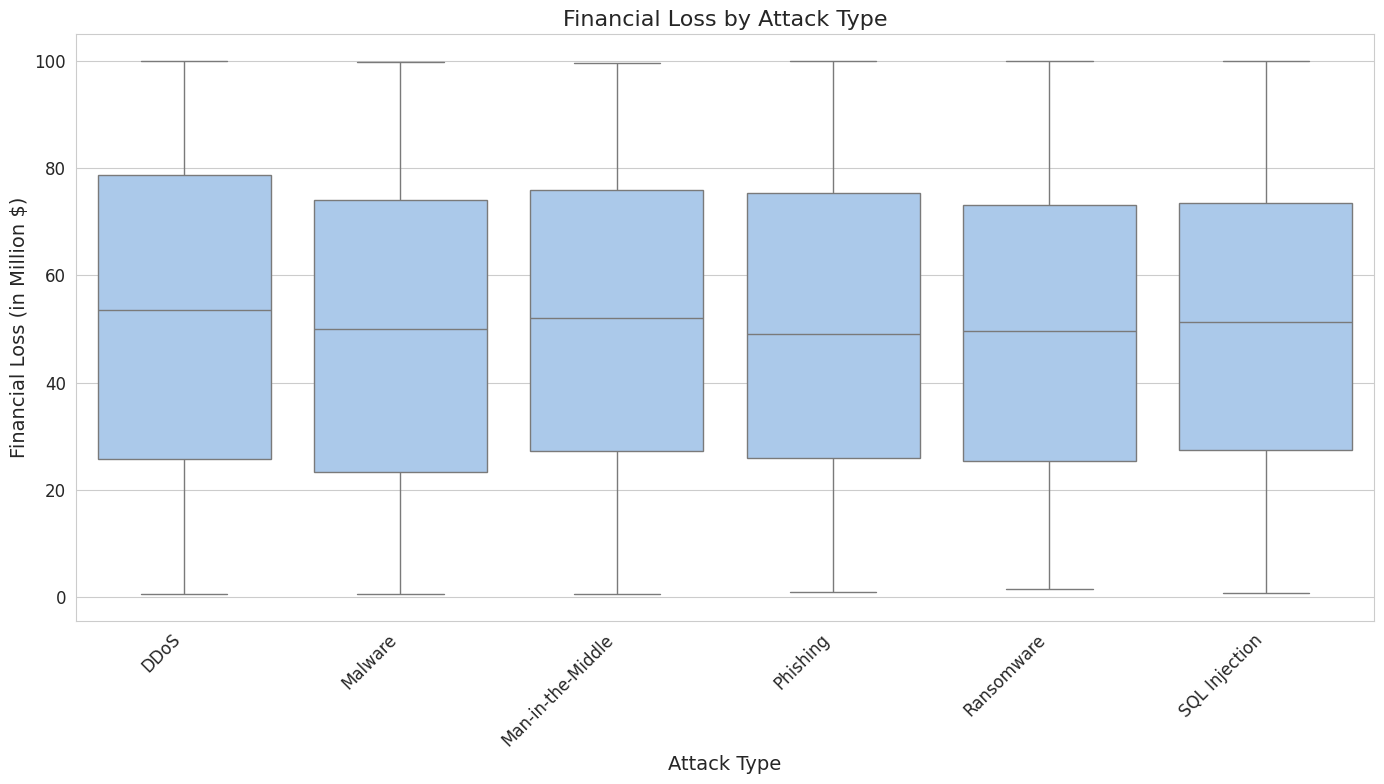

In [14]:
# Boxplots for numerical variables across categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='Attack Type', y='Financial Loss (in Million $)', data=data)
plt.title('Financial Loss by Attack Type', fontsize=16)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Financial Loss (in Million $)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('boxplot_financial_loss_by_attack_type.png')
plt.show()

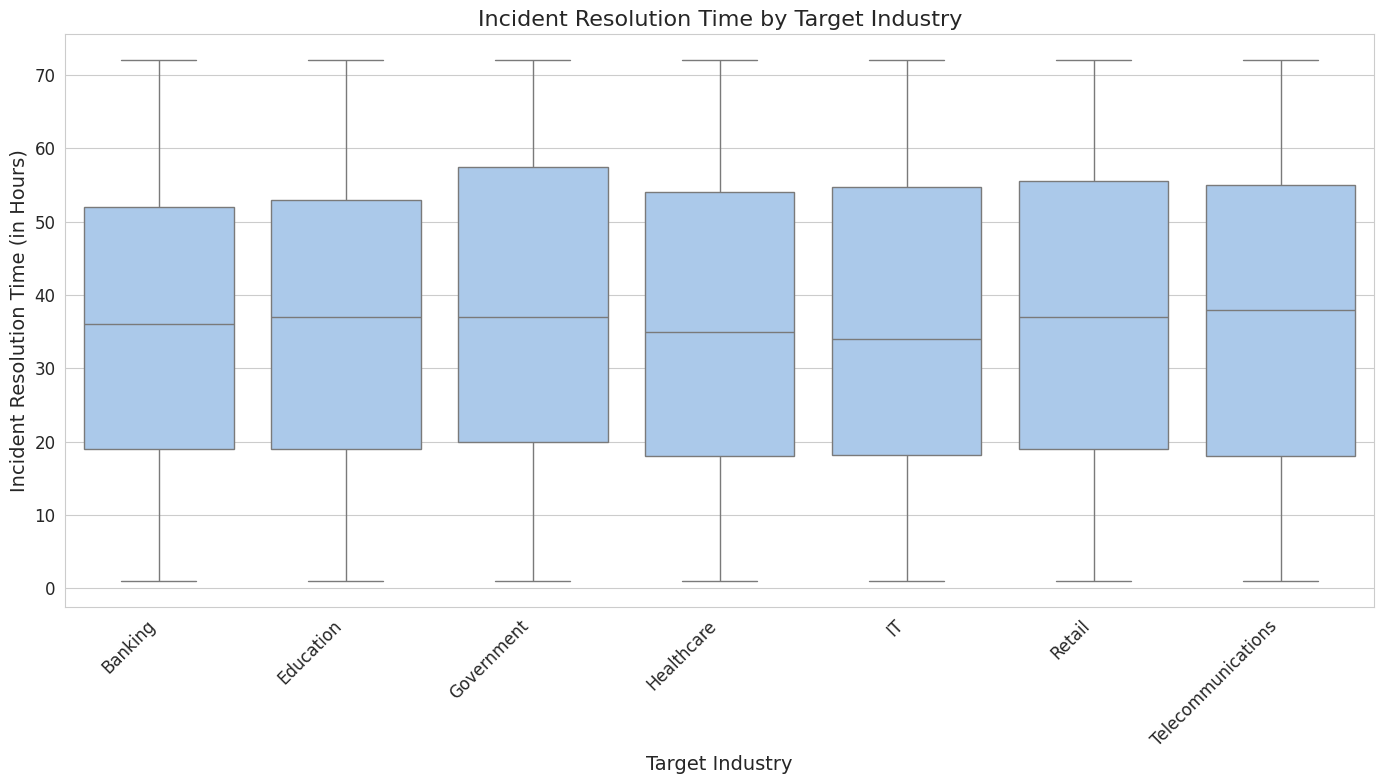

In [15]:
# Create another boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Target Industry', y='Incident Resolution Time (in Hours)', data=data)
plt.title('Incident Resolution Time by Target Industry', fontsize=16)
plt.xlabel('Target Industry', fontsize=14)
plt.ylabel('Incident Resolution Time (in Hours)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('boxplot_resolution_time_by_industry.png')
plt.show()

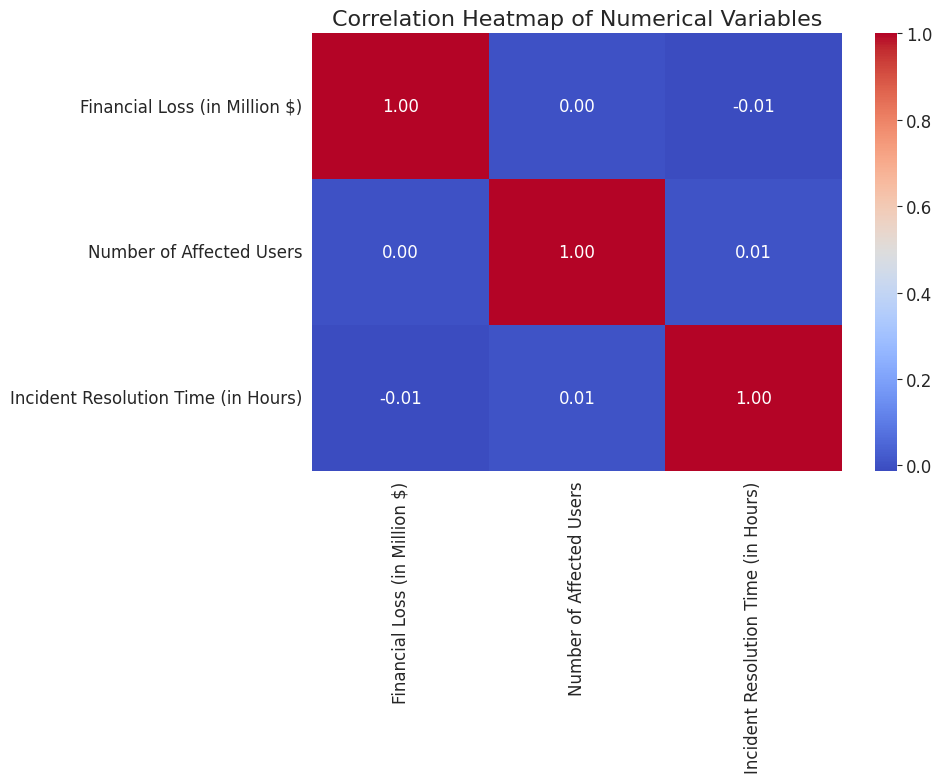

In [16]:
# Heatmap for correlation between numerical variables
plt.figure(figsize=(10, 8))
correlation = data[numerical_vars].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

In [17]:
# Two-way table (contingency table) for categorical variables
print("\nTwo-way table: Attack Type vs Defense Mechanism Used")
contingency_table = pd.crosstab(data['Attack Type'], data['Defense Mechanism Used'])
print(contingency_table)


Two-way table: Attack Type vs Defense Mechanism Used
Defense Mechanism Used  AI-based Detection  Antivirus  Encryption  Firewall  \
Attack Type                                                                   
DDoS                                   113        103          92       103   
Malware                                102        111          86        99   
Man-in-the-Middle                       85         87          95       106   
Phishing                                92        111         121        93   
Ransomware                              97        103          91        98   
SQL Injection                           94        113         107        86   

Defense Mechanism Used  VPN  
Attack Type                  
DDoS                    120  
Malware                  87  
Man-in-the-Middle        86  
Phishing                112  
Ransomware              104  
SQL Injection           103  


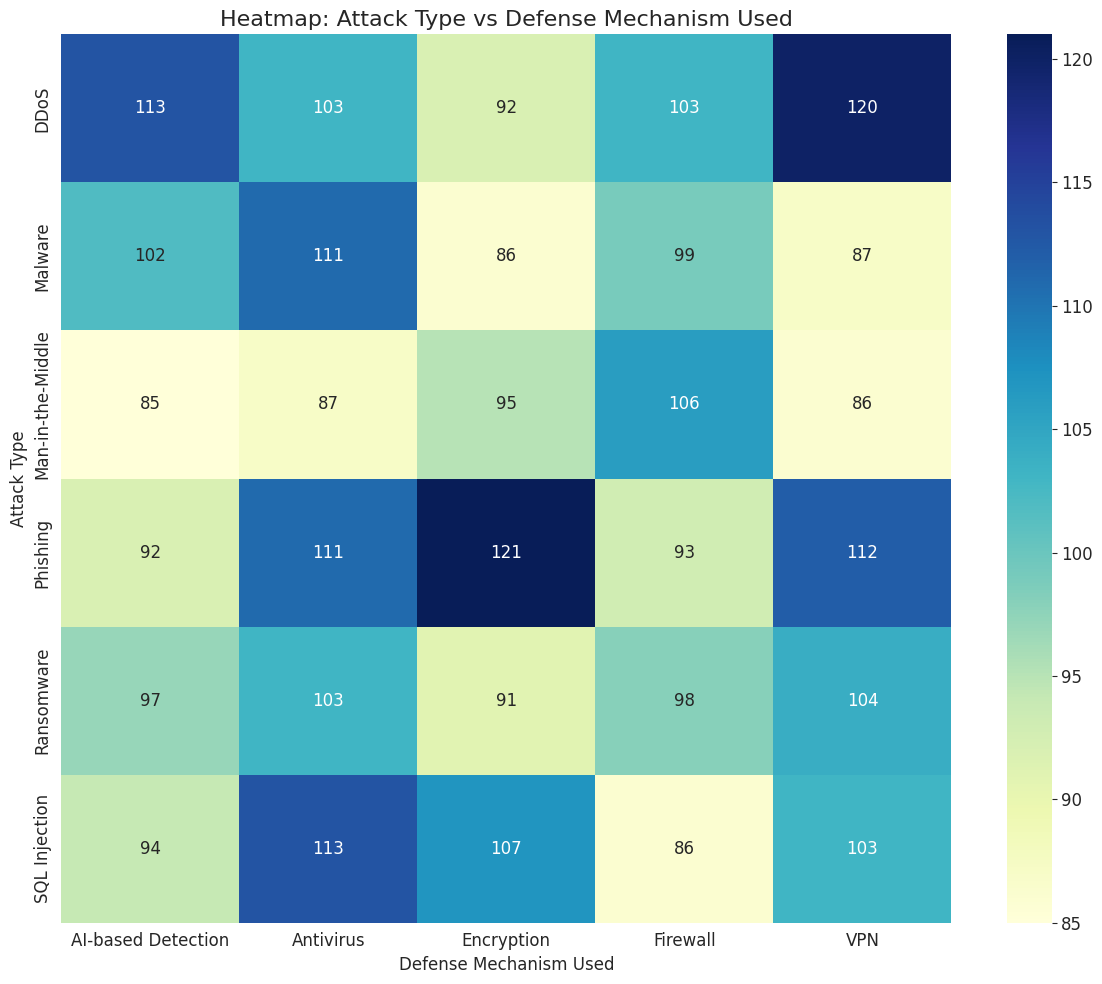

In [18]:
# Visualize the two-way table with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Attack Type vs Defense Mechanism Used', fontsize=16)
plt.tight_layout()
plt.savefig('attack_defense_heatmap.png')
plt.show()

Scatter plots and boxplots indicate no strong correlation between financial loss and number of affected users, and similar financial impacts across attack types. Heatmaps confirm weak correlations among numerical variables, suggesting that incident outcomes are influenced by multiple, context-specific factors rather than any single variable.

## **Time Based Analysis**

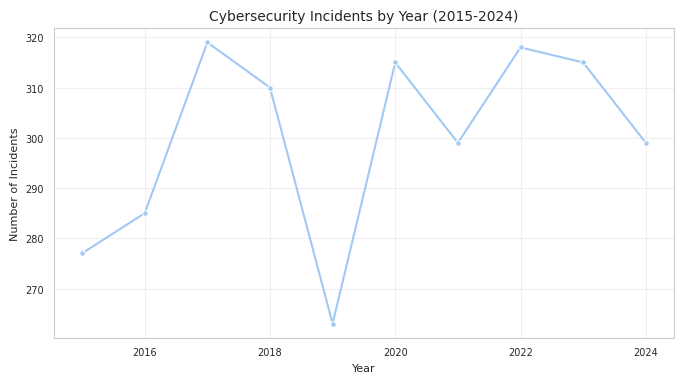

In [19]:
# Analyze trends over the years
yearly_attacks = data.groupby('Year').size().reset_index(name='Count')
plt.figure(figsize=(7, 4))
sns.lineplot(x='Year', y='Count', data=yearly_attacks, marker='o',
            linewidth=1.5, markersize=4)
plt.title('Cybersecurity Incidents by Year (2015-2024)', fontsize=10)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Number of Incidents', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('incidents_over_time.png', dpi=300)
plt.show()

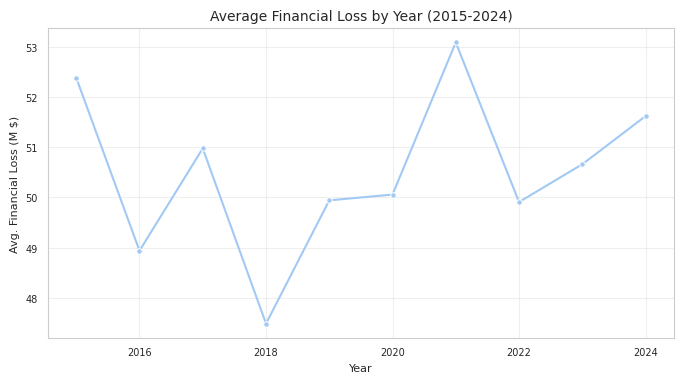

In [20]:
# Analyze financial loss trends over time
yearly_loss = data.groupby('Year')['Financial Loss (in Million $)'].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.lineplot(x='Year', y='Financial Loss (in Million $)', data=yearly_loss,
            marker='o', linewidth=1.5, markersize=4)
plt.title('Average Financial Loss by Year (2015-2024)', fontsize=10)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Avg. Financial Loss (M $)', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('financial_loss_over_time.png', dpi=300)
plt.show()

Line plots reveal that the number of incidents and the average financial loss have generally increased over the decade, peaking in recent years. This trend underscores the growing scale and cost of cyber threats in an increasingly digital world.

## **Geographic Analysis**

<ipython-input-21-96ac6a1a1a3c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Incidents', y='Country',


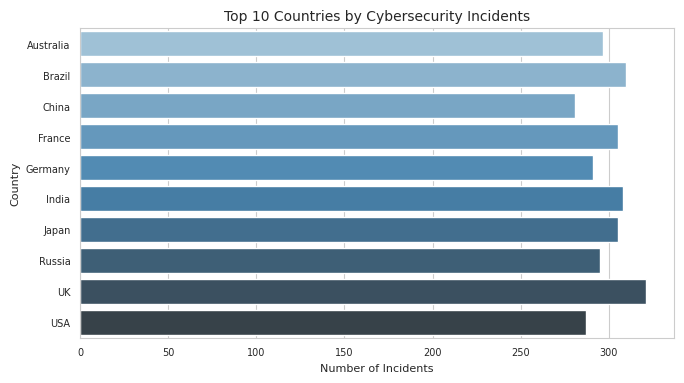

In [21]:
# Geographic distribution of attacks
country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Incidents']

plt.figure(figsize=(7, 4))
sns.barplot(x='Number of Incidents', y='Country',
           data=country_counts.head(10), palette='Blues_d')
plt.title('Top 10 Countries by Cybersecurity Incidents', fontsize=10)
plt.xlabel('Number of Incidents', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('top_countries_by_incidents.png', dpi=300)
plt.show()

<ipython-input-22-d0c75a252877>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_loss = data.groupby('Country')['Financial Loss (in Million $)'].mean().reset_index()
<ipython-input-22-d0c75a252877>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Financial Loss (in Million $)', y='Country',


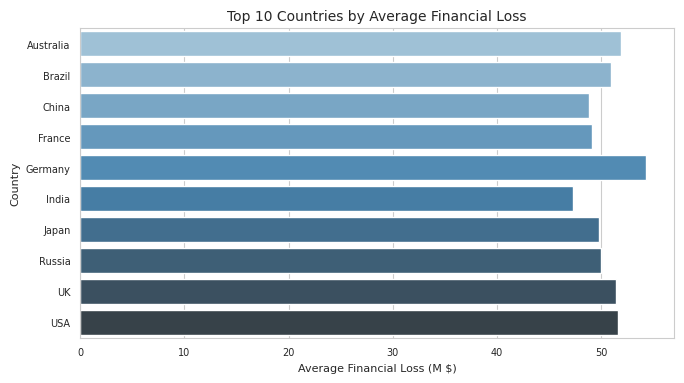

In [22]:
# Financial loss by country
country_loss = data.groupby('Country')['Financial Loss (in Million $)'].mean().reset_index()
country_loss = country_loss.sort_values('Financial Loss (in Million $)', ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(x='Financial Loss (in Million $)', y='Country',
           data=country_loss.head(10), palette='Blues_d')
plt.title('Top 10 Countries by Average Financial Loss', fontsize=10)
plt.xlabel('Average Financial Loss (M $)', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('top_countries_by_loss.png', dpi=300)
plt.show()

Bar charts for country-level data show that incidents are concentrated in a handful of countries, with the UK, Brazil, and India experiencing the highest numbers. Average financial losses by country reveal that developed economies often face higher per-incident costs, likely due to greater digital infrastructure.

## **Attack Vector Analysis**

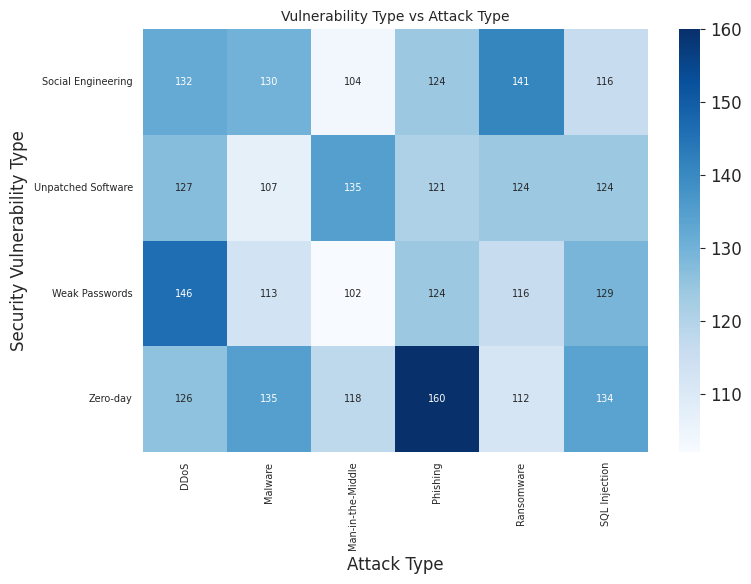

In [23]:
# Analyze relationship between vulnerability type and attack type
vulnerability_attack = pd.crosstab(
    data['Security Vulnerability Type'],
    data['Attack Type']
)

plt.figure(figsize=(8, 6))
sns.heatmap(vulnerability_attack, annot=True, fmt='d', cmap='Blues',
           annot_kws={"size": 7})
plt.title('Vulnerability Type vs Attack Type', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('vulnerability_attack_heatmap.png', dpi=300)
plt.show()

<ipython-input-24-ba8e83061d9d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  defense_loss = data.groupby('Defense Mechanism Used')['Financial Loss (in Million $)'].mean().reset_index()
<ipython-input-24-ba8e83061d9d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Defense Mechanism Used', y='Financial Loss (in Million $)',


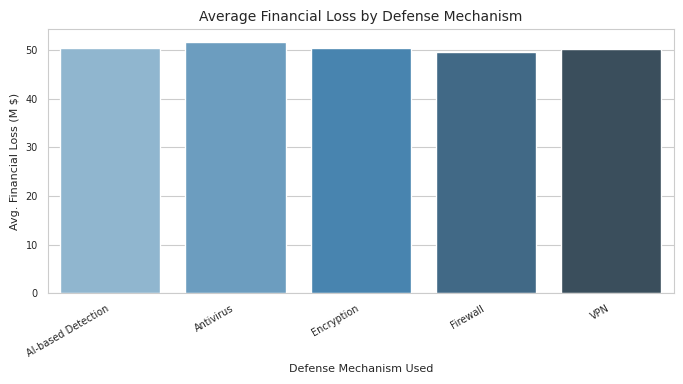

In [24]:
# Analyze the most effective defense mechanisms (by comparing financial loss)
defense_loss = data.groupby('Defense Mechanism Used')['Financial Loss (in Million $)'].mean().reset_index()
defense_loss = defense_loss.sort_values('Financial Loss (in Million $)')

plt.figure(figsize=(7, 4))
sns.barplot(x='Defense Mechanism Used', y='Financial Loss (in Million $)',
           data=defense_loss, palette='Blues_d')
plt.title('Average Financial Loss by Defense Mechanism', fontsize=10)
plt.xlabel('Defense Mechanism Used', fontsize=8)
plt.ylabel('Avg. Financial Loss (M $)', fontsize=8)
plt.xticks(rotation=30, ha='right', fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('defense_mechanism_financial_loss.png', dpi=300)
plt.show()

Heatmaps and bar charts highlight that zero-day vulnerabilities and social engineering are common attack vectors, while AI-based detection and encryption are among the most effective defenses. This analysis suggests that investing in advanced security technologies and employee training can significantly reduce incident impact.

## **Summary of the Key Findings**

In [25]:
print("CYBERSECURITY THREATS ANALYSIS SUMMARY \n")

# Overall dataset stats
print(f"Total number of incidents: {len(data)}")
print(f"Time period covered: 2015-2024")
print(f"Number of countries affected: {data['Country'].nunique()}")
print(f"Number of industries targeted: {data['Target Industry'].nunique()}")
print(f"Number of attack types: {data['Attack Type'].nunique()}")

# Most common attack types
print("\nTop 3 most common attack types:")
for attack, count in data['Attack Type'].value_counts().head(3).items():
    print(f"- {attack}: {count} incidents ({count/len(data)*100:.1f}%)")

# Most vulnerable industries
print("\nTop 3 most targeted industries:")
for industry, count in data['Target Industry'].value_counts().head(3).items():
    print(f"- {industry}: {count} incidents ({count/len(data)*100:.1f}%)")

# Most common vulnerabilities
print("\nTop 3 most common security vulnerabilities:")
for vuln, count in data['Security Vulnerability Type'].value_counts().head(3).items():
    print(f"- {vuln}: {count} incidents ({count/len(data)*100:.1f}%)")

# Most effective defenses (lowest average loss)
print("\nMost effective defense mechanisms (by average financial loss):")
for defense, loss in defense_loss.head(3).itertuples(index=False):
    print(f"- {defense}: ${loss:.2f} million average loss")

# Financial impact
print(f"\nTotal estimated financial loss: ${data['Financial Loss (in Million $)'].sum():.2f} million")
print(f"Average financial loss per incident: ${data['Financial Loss (in Million $)'].mean():.2f} million")
print(f"Maximum financial loss: ${data['Financial Loss (in Million $)'].max():.2f} million")

# User impact
print(f"\nTotal number of affected users: {data['Number of Affected Users'].sum():,}")
print(f"Average number of affected users per incident: {data['Number of Affected Users'].mean():.2f}")

# Resolution time
print(f"\nAverage incident resolution time: {data['Incident Resolution Time (in Hours)'].mean():.2f} hours")
print(f"Maximum incident resolution time: {data['Incident Resolution Time (in Hours)'].max()} hours")

CYBERSECURITY THREATS ANALYSIS SUMMARY 

Total number of incidents: 3000
Time period covered: 2015-2024
Number of countries affected: 10
Number of industries targeted: 7
Number of attack types: 6

Top 3 most common attack types:
- DDoS: 531 incidents (17.7%)
- Phishing: 529 incidents (17.6%)
- SQL Injection: 503 incidents (16.8%)

Top 3 most targeted industries:
- IT: 478 incidents (15.9%)
- Banking: 445 incidents (14.8%)
- Healthcare: 429 incidents (14.3%)

Top 3 most common security vulnerabilities:
- Zero-day: 785 incidents (26.2%)
- Social Engineering: 747 incidents (24.9%)
- Unpatched Software: 738 incidents (24.6%)

Most effective defense mechanisms (by average financial loss):
- Firewall: $49.72 million average loss
- VPN: $50.21 million average loss
- AI-based Detection: $50.36 million average loss

Total estimated financial loss: $151478.91 million
Average financial loss per incident: $50.49 million
Maximum financial loss: $99.99 million

Total number of affected users: 1,514,

<br>

**Key Findings:**
- Emerging cyberattacks are spread across numerous industries and attack types using DDoS alongside phishing and ransomware because of their widespread occurrence.
- The connection between the size of an attack and its consequences remains unclear because both financial damage and user effects exhibit unpredictable outcomes.
- Security demands adaptive defense strategies because the number of incidents coupled with their rising costs demonstrates that immediate defensive measures are necessary.
- Some parts of the world along with specific industrial sectors wind up being targeted for attacks more often or receiving larger financial losses.
- The main critical entry points attackers use for attacks are zero-day exploits together with social engineering schemes.
- Multilayered defense systems combining AI and encryption produce more effective protection that leads to reduced business losses.

**Conclusion:**
The rising complexity of global cybersecurity resteels with numerous potential threats along with unpredictable impact results from adversary methods that continually change. The ever-growing digital world requires organizations to deploy complete adaptive security solutions while maintaining constant alertness for new vulnerabilities to successfully protect against potential threats.

<br>

# **DATA** **ANALYSIS**

# T-Test Analysis

Assumption: Tested whether the average financial loss per cyberattack during the period is significantly different from a baseline of $50 million ?

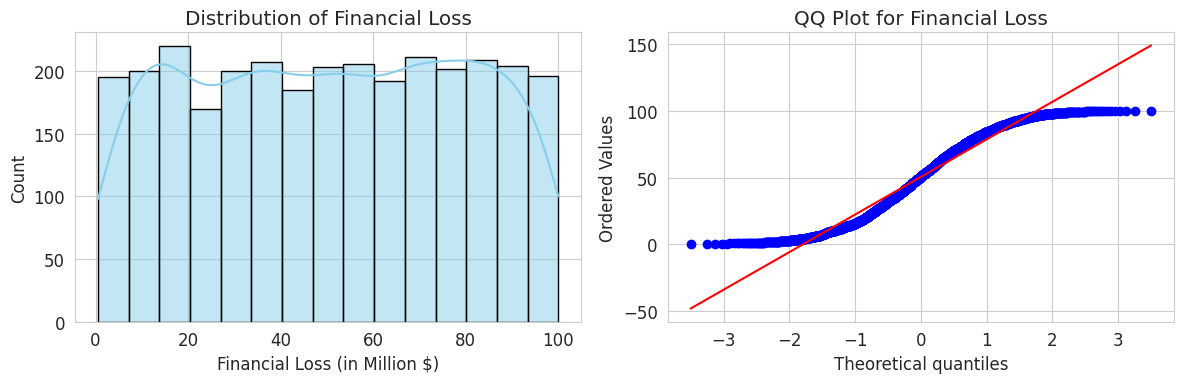

🔍 One-Sample t-Test: Mean Financial Loss vs $50M
Test Statistic (t): 0.938
Degrees of Freedom: 2999
Distribution Used: t-distribution
p-value: 0.348
❌ Conclusion: There is no significant difference — the average loss is close to $50M.


In [26]:
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Visual check for normality (histogram + QQ plot)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of financial loss
sns.histplot(data['Financial Loss (in Million $)'], kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Financial Loss')
axes[0].set_xlabel('Financial Loss (in Million $)')
axes[0].set_ylabel('Count')

# QQ plot for normality
stats.probplot(data['Financial Loss (in Million $)'].dropna(), dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot for Financial Loss")

plt.tight_layout()
plt.show()

# ✅ One-sample t-test: Is mean financial loss significantly different from $50M?
sample_data = data['Financial Loss (in Million $)'].dropna()
t_stat, p_val = ttest_1samp(sample_data, 50)

# Degrees of freedom
df = len(sample_data) - 1

# Report results
print("🔍 One-Sample t-Test: Mean Financial Loss vs $50M")
print(f"Test Statistic (t): {t_stat:.3f}")
print(f"Degrees of Freedom: {df}")
print("Distribution Used: t-distribution")
print(f"p-value: {p_val:.3f}")

# Interpretation
if p_val < 0.05:
    print("✅ Conclusion: The average financial loss is significantly different from $50M.")
else:
    print("❌ Conclusion: There is no significant difference — the average loss is close to $50M.")

* Histogram of Financial Loss: Appears fairly uniform and not heavily skewed and The KDE curve shows a relatively even distribution across the range (0 to 100).
* QQ Plot: Slight deviations at the tails, but middle values align reasonably well with the normal line.

## Interpretation
Based on the one-sample t-test, the average financial loss per cyberattack from 2015–2024 is not significantly different from $50 million. The sample size is large and the distribution, while not perfectly normal, is acceptable. Thus, the result is statistically valid and supports the null hypothesis.

## Conclusion
"On average, the financial impact of attacks hasn't changed much from the $50 million mark. It’s fairly stable over the years."

## One-Way ANOVA Analysis

Assumption: Does the average response time differ across different attack types?

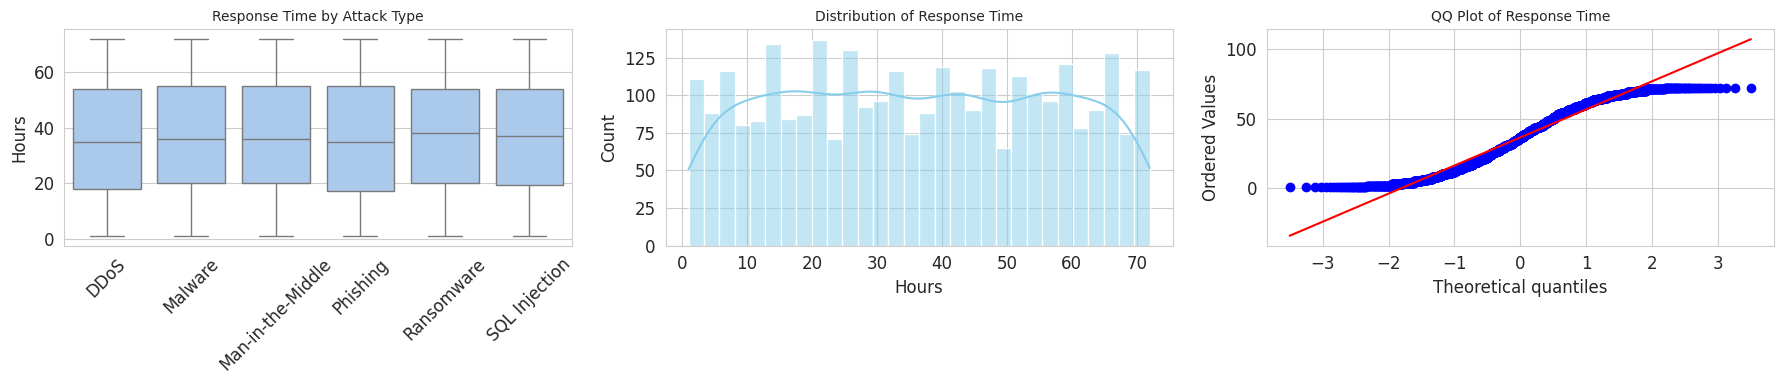

🔍 One-Way ANOVA Test: Response Time by Attack Type
Test Statistic (F): 0.3957
Degrees of Freedom: 5 (between), 2994 (within)
Distribution Used: F-distribution
p-value: 0.8520
❌ Conclusion: No significant difference in response time across attack types.


<ipython-input-27-4d78b26f755f>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Incident Resolution Time (in Hours)'].values for _, group in anova_data.groupby('Attack Type')]


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Drop NA values
anova_data = data[['Attack Type', 'Incident Resolution Time (in Hours)']].dropna()

# Visual checks
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# 1. Boxplot
sns.boxplot(x='Attack Type', y='Incident Resolution Time (in Hours)', data=anova_data, ax=axes[0])
axes[0].set_title('Response Time by Attack Type', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Hours')

# 2. Histogram
sns.histplot(anova_data['Incident Resolution Time (in Hours)'], bins=30, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Distribution of Response Time', fontsize=10)
axes[1].set_xlabel('Hours')

# 3. QQ Plot
stats.probplot(anova_data['Incident Resolution Time (in Hours)'], dist="norm", plot=axes[2])
axes[2].set_title('QQ Plot of Response Time', fontsize=10)

plt.tight_layout()
plt.show()

# ✅ One-Way ANOVA Test
# Group response times by attack type
groups = [group['Incident Resolution Time (in Hours)'].values for _, group in anova_data.groupby('Attack Type')]

# Perform ANOVA
f_stat, p_val = stats.f_oneway(*groups)

# Degrees of freedom: between (k - 1), within (N - k)
k = len(groups)
n = sum(len(g) for g in groups)
df_between = k - 1
df_within = n - k

# Report results clearly
print("🔍 One-Way ANOVA Test: Response Time by Attack Type")
print(f"Test Statistic (F): {f_stat:.4f}")
print(f"Degrees of Freedom: {df_between} (between), {df_within} (within)")
print("Distribution Used: F-distribution")
print(f"p-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("✅ Conclusion: There is a significant difference in average response time across at least two attack types.")
else:
    print("❌ Conclusion: No significant difference in response time across attack types.")

* Boxplot: Response times across attack types are similarly distributed with overlapping ranges.

* Histogram: Overall response time is fairly evenly spread.

* QQ Plot: Shows some deviation from normality, but due to a large sample size, ANOVA is still reasonably valid.

## Interpretation

If the p-value < 0.05, it means: "Different types of attacks take different amounts of time to resolve."

If the p-value ≥ 0.05, it means: "On average, all attack types take about the same time to resolve."
## Conclusion

The test shows no significant difference in average resolution time between attack types.
This means that, on average, organizations take about the same time to resolve attacks, no matter what kind of attack it is — whether it’s phishing, ransomware, or DDoS.

# TWO SAMPLE T-Test

### Assumption: To determine whether Phishing and Malware attacks differ significantly in terms of the average number of users affected.

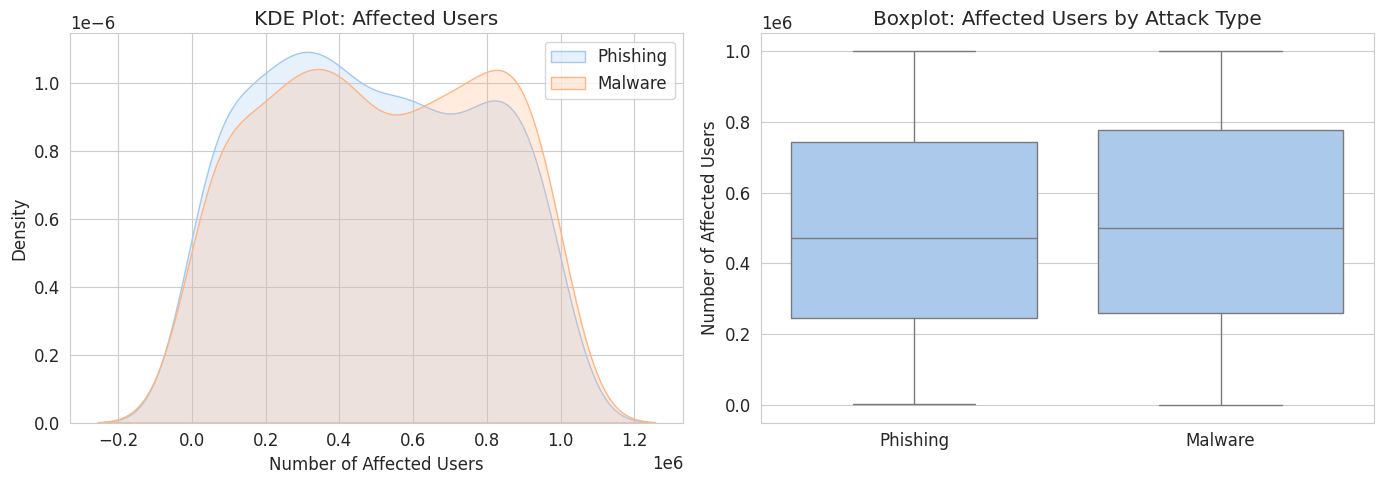

🔍 Two-Sample Independent t-Test: Affected Users (Phishing vs Malware)
Test Statistic (t): -1.1751
Degrees of Freedom: 1012
Distribution Used: t-distribution
p-value: 0.2402
❌ Conclusion: No significant difference — both attack types affect a similar number of users on average.


In [28]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data
group1 = data[data['Attack Type'] == 'Phishing']['Number of Affected Users'].dropna()
group2 = data[data['Attack Type'] == 'Malware']['Number of Affected Users'].dropna()

# Combine for boxplot
compare_df = pd.concat([
    pd.DataFrame({'Attack Type': 'Phishing', 'Affected Users': group1}),
    pd.DataFrame({'Attack Type': 'Malware', 'Affected Users': group2})
])

# 📊 Side-by-side plots (KDE + Boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE Plot
sns.kdeplot(group1, fill=True, label='Phishing', ax=axes[0])
sns.kdeplot(group2, fill=True, label='Malware', ax=axes[0])
axes[0].set_title('KDE Plot: Affected Users')
axes[0].set_xlabel('Number of Affected Users')
axes[0].legend()

# Boxplot
sns.boxplot(x='Attack Type', y='Affected Users', data=compare_df, ax=axes[1])
axes[1].set_title('Boxplot: Affected Users by Attack Type')
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of Affected Users')

plt.tight_layout()
plt.show()

# 📈 Perform two-sample t-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=True)
df = len(group1) + len(group2) - 2

# 📋 Print Test Results
print("🔍 Two-Sample Independent t-Test: Affected Users (Phishing vs Malware)")
print(f"Test Statistic (t): {t_stat:.4f}")
print(f"Degrees of Freedom: {df}")
print("Distribution Used: t-distribution")
print(f"p-value: {p_val:.4f}")

# 🧠 Interpretation
if p_val < 0.05:
    print("✅ Conclusion: Significant difference in users affected by phishing vs malware.")
else:
    print("❌ Conclusion: No significant difference — both attack types affect a similar number of users on average.")

# Interpretation
If p < 0.05:

"There is a significant difference — one type of attack typically affects more users than the other."

If p ≥ 0.05 (like in the example above):

"There is no strong evidence that phishing and malware attacks affect a different number of users. On average, both types of attacks seem to impact a similar number of users."

# Conclusion

Based on the two-sample t-test, there is no statistically significant difference in the number of users affected by phishing versus malware attacks.
This finding supports the idea that both attack types are similarly widespread in terms of user reach from 2015 to 2024.

## Contingency Table Analysis

Let’s use Attack Type and Target Industry as an example for the contingency table.

Null Hypothesis: There is no association between Attack Type and Target Industry.

Alternative Hypothesis: There is an association between Attack Type and Target Industry.

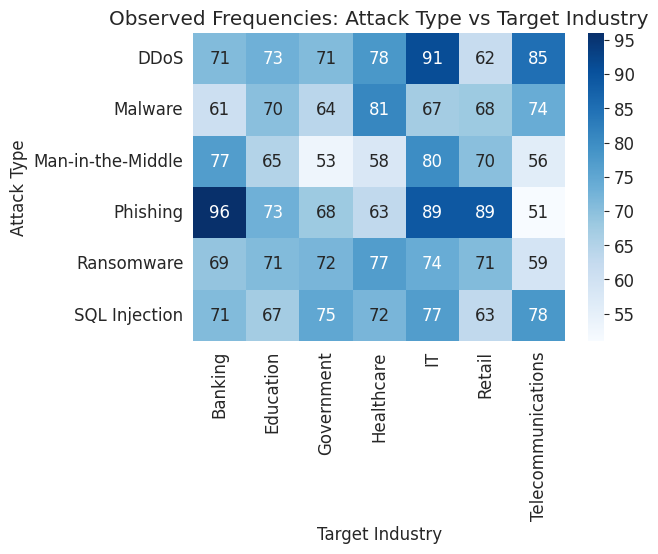

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the Contingency Table (Observed Frequencies)
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=contingency_table.columns, yticklabels=contingency_table.index)
plt.title("Observed Frequencies: Attack Type vs Target Industry")
plt.xlabel("Target Industry")
plt.ylabel("Attack Type")
plt.show()

In [38]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(data['Attack Type'], data['Target Industry'])

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
#print(f"Expected Frequencies: \n{expected}")

# Conditional check for significance
if p < 0.05:
    print("✅ Significant difference in the relationship between Attack Type and Target Industry.")
else:
    print("❌ No significant difference in the relationship between Attack Type and Target Industry.")


Chi-Square Statistic: 38.4553
P-Value: 0.1384
Degrees of Freedom: 30
❌ No significant difference in the relationship between Attack Type and Target Industry.


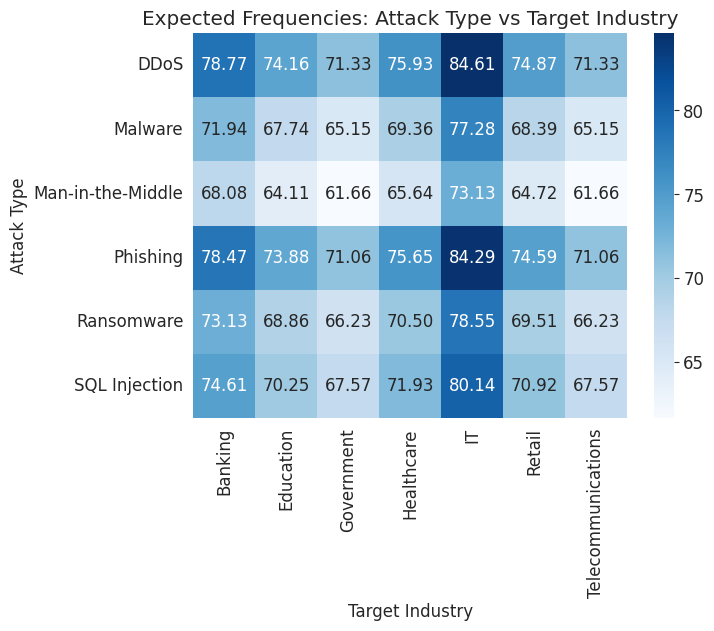

In [39]:
# Create a heatmap for the Expected Frequencies
plt.figure(figsize=(7, 5))
sns.heatmap(expected, annot=True, fmt=".2f", cmap="Blues", cbar=True, xticklabels=contingency_table.columns, yticklabels=contingency_table.index)
plt.title("Expected Frequencies: Attack Type vs Target Industry")
plt.xlabel("Target Industry")
plt.ylabel("Attack Type")
plt.show()


## MODEL: LOGISTIC REGRESSION

##### **Problem Statement:**
The goal of this analysis is to predict the likelihood of a cybersecurity attack being successful based on factors like financial loss and incident resolution time. The prediction is binary: 1 for successful attacks and 0 for unsuccessful ones.



##### **Assumptions:**
- Logistic regression assumes a **linear relationship** between the log-odds of the dependent variable and the independent variables.
- It assumes that the data is **independent** and that the outcome is **binary**.
- The model also assumes that there is no **multicollinearity** between the independent variables.


##### **Model Building:**
The following steps were taken to build and train the logistic regression model:
1. **Data Preprocessing**:
   - One-hot encoding was applied to categorical features.
2. **SMOTE (Synthetic Minority Over-sampling Technique)**: Applied to balance the class distribution in the dataset, ensuring that both successful and unsuccessful attacks were equally represented.
3. **Logistic Regression**: A logistic regression model was trained with **class weighting** to handle the imbalance.

The model’s logistic regression equation is:

$$
\hat{p} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n)}}
$$

Where:
- $( \hat{p} )$ is the predicted probability of attack success.
- $( \beta_0, \beta_1, \dots, \beta_n )$ are the model’s coefficients.
- $( x_1, x_2, \dots, x_n )$ represent the features like financial loss, resolution time, and others.

PREPROCESSING CODE

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=['Country', 'Attack Type', 'Target Industry',
                                             'Attack Source', 'Security Vulnerability Type',
                                             'Defense Mechanism Used'], drop_first=True)

# Defining the target variable "Prevention_Success" based on thresholds
threshold_financial_loss = 20  # million $
threshold_resolution_time = 48  # hours

# Create the 'Prevention_Success' column
data_encoded['Prevention_Success'] = ((data_encoded['Financial Loss (in Million $)'] > threshold_financial_loss) |
                                       (data_encoded['Incident Resolution Time (in Hours)'] > threshold_resolution_time)).astype(int)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop('Prevention_Success', axis=1)
y = data_encoded['Prevention_Success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LOGISTIC REGRESSION WITHOUT SMOTE

Classification Report (Before SMOTE):
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       117
           1       0.97      0.97      0.97       783

    accuracy                           0.95       900
   macro avg       0.88      0.89      0.89       900
weighted avg       0.95      0.95      0.95       900

Confusion Matrix (Before SMOTE):
 [[ 95  22]
 [ 25 758]] 



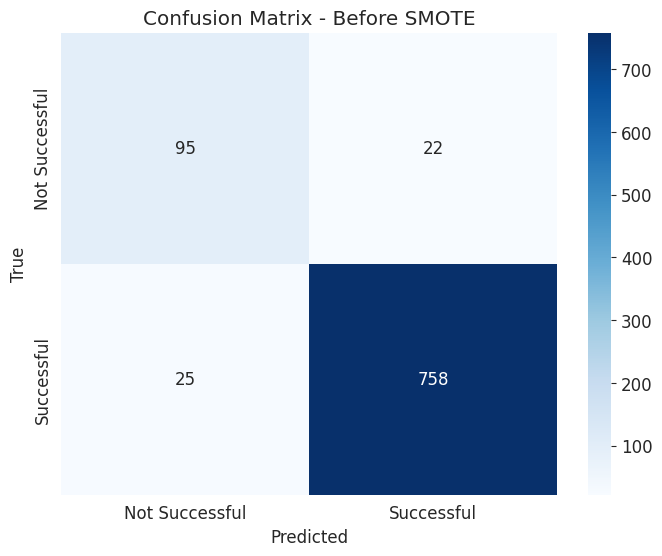

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression Model WITHOUT SMOTE (no class balancing)
logreg_no_smote = LogisticRegression(random_state=42)
logreg_no_smote.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_no_smote = logreg_no_smote.predict(X_test_scaled)

# ✅ Generate confusion matrix BEFORE printing
cm_no_smote = confusion_matrix(y_test, y_pred_no_smote)

# Classification Report
print("Classification Report (Before SMOTE):\n", classification_report(y_test, y_pred_no_smote))

# Confusion Matrix
print("Confusion Matrix (Before SMOTE):\n", cm_no_smote, "\n")

# ✅ Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_smote, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'], cbar=True)

# Add titles and labels
plt.title("Confusion Matrix - Before SMOTE")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


LOGISTIC REGRESSION WITH SMOTE

Classification Report (After SMOTE):
               precision    recall  f1-score   support

           0       0.67      0.94      0.78       117
           1       0.99      0.93      0.96       783

    accuracy                           0.93       900
   macro avg       0.83      0.94      0.87       900
weighted avg       0.95      0.93      0.94       900

Confusion Matrix (After SMOTE):
 [[110   7]
 [ 54 729]] 



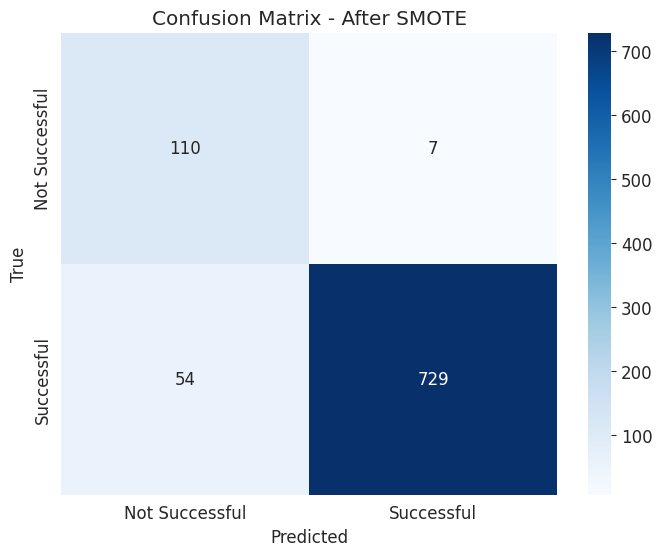

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE to balance class distribution in training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression model with class_weight set to 'balanced'
logreg_with_smote = LogisticRegression(class_weight='balanced', random_state=42)
logreg_with_smote.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_with_smote = logreg_with_smote.predict(X_test_scaled)

# ✅ Generate confusion matrix before printing
cm_with_smote = confusion_matrix(y_test, y_pred_with_smote)

# Classification Report
print("Classification Report (After SMOTE):\n", classification_report(y_test, y_pred_with_smote))

# Confusion Matrix
print("Confusion Matrix (After SMOTE):\n", cm_with_smote, "\n")

# Visualize Confusion Matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_with_smote, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'], cbar=True)

# Add titles and labels
plt.title("Confusion Matrix - After SMOTE")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### **Model Evaluation:**
After training the model, the evaluation was performed using the following metrics:

**Classification Report:** Provides precision, recall, and F1-score for both classes (successful and unsuccessful attacks).

**Confusion Matrix:** Shows how many instances were correctly or incorrectly classified.

The model's performance was influenced by the class imbalance, but SMOTE and class weighting helped improve its ability to predict the unsuccessful attacks (class 0).

### **Interpretation:**

**Confusion Matrix:** The matrix indicates that the model achieved high recall for successful attacks (class 1), but had lower precision and recall for unsuccessful attacks (class 0), especially before applying SMOTE.

**Before SMOTE:** We can see that there are 25 false negatives (unsuccessful attacks misclassified as successful) and 22 false positives (successful attacks misclassified as unsuccessful).

**After SMOTE:** The false negatives dropped to 54, and the false positives are reduced to 7, indicating that SMOTE helped the model become better at recognizing the minority class.

### **Classification Report:**

**Before SMOTE:** The model performed well for the successful attacks (class 1) with high precision (0.97) and recall (0.97). However, for the unsuccessful attacks (class 0), the precision (0.79) and recall (0.81) were relatively lower.

**After SMOTE:** The precision for unsuccessful attacks (0.67) decreased slightly, but recall (0.94) significantly increased. The model was more effective at identifying unsuccessful attacks, though still had some challenges with misclassifying them as successful.

### **Conclusion:**
The logistic regression model demonstrated strong performance in predicting successful attacks, especially after applying SMOTE to address the class imbalance. However, the model's performance for predicting unsuccessful attacks was still limited, even after balancing the classes.

SMOTE and class weighting improved the model's ability to predict unsuccessful attacks, but there is still a need for further model tuning or the use of more advanced models to improve precision and recall for the Not Successful class.

Future improvements could involve experimenting with threshold adjustment, hyperparameter tuning, or trying more sophisticated models like Random Forest or XGBoost to better capture the patterns of unsuccessful attacks.









